**Ануфриева Виктория, 5130901/10202**

### *Упражнение 4.1.*

Скачаем вариант шума природы с сайта http://asoftmurmur.com/about/ - звук грозы. Нам необходим опрезок в 1.5 секунды, выведем его спектр:


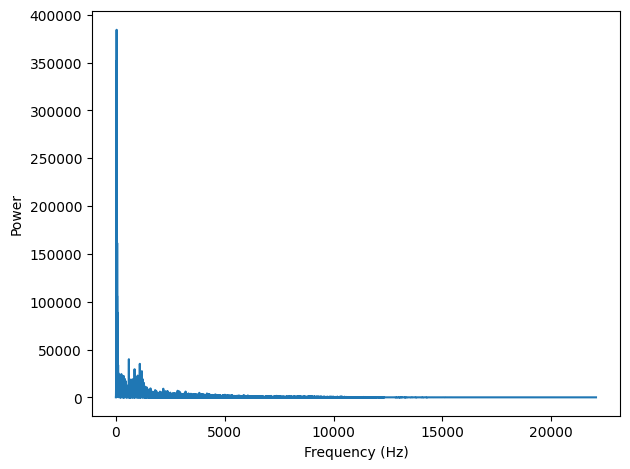

In [1]:
from thinkdsp import read_wave, decorate

wave = read_wave('122117__kyster__rain-late-at-night.wav')
segment = wave.segment(start=0.0, duration=1.5)
spectrum = segment.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')
segment.make_audio()

Видно, что на низких частотах сформировался сильный пик, а остальные частоты практически не заметны.
Такой шкм напоминает розовый или красный шум. Чтобы проверить предположение, выведем спектр мощности в логарифмическом масштабе:

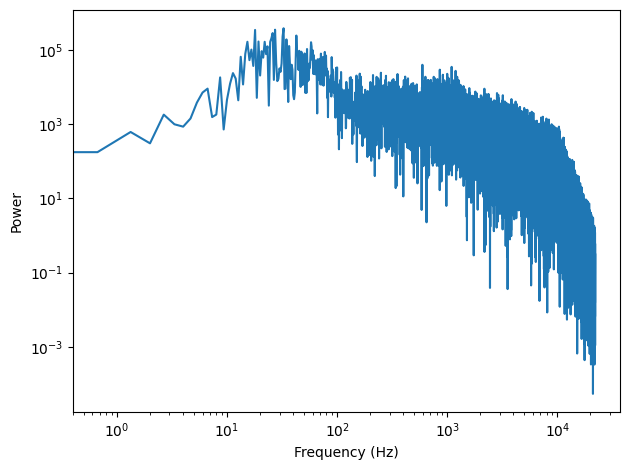

In [2]:
spectrum.plot_power()

loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Зависимости, которые уже были рассмотрены, не имели промежутков возрастания в отличие от полученного спектра - такое поведение неожиданно.

Рассмотрим спектрограмму во времени, возмём другой промежуток аудиозаписи:


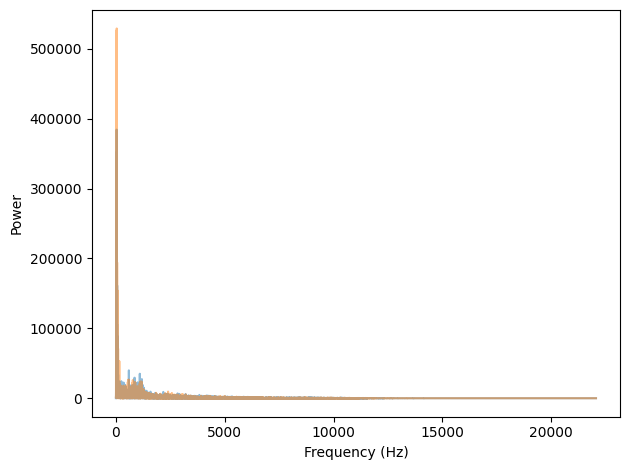

In [6]:
segment2 = wave.segment(start=3, duration=1.5)
spectrum2 = segment2.make_spectrum()

spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power')

По графику видно, что мощность второго сигнала заметно превышает мощность первого на низких частотах и схожа с мощностью первого на промежутке после основного пика.

Выведем оба сигнала в логарифмической системе:


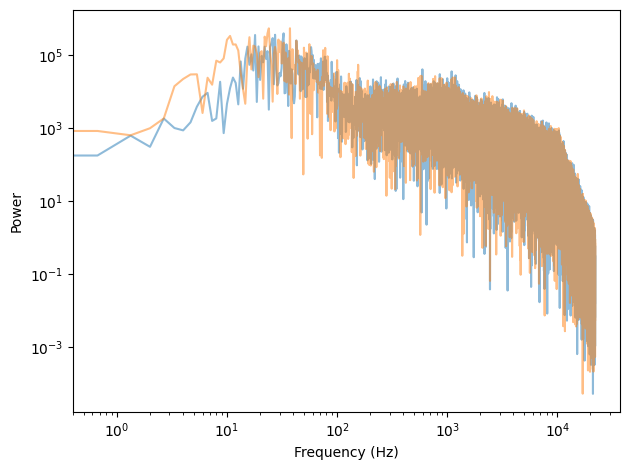

In [7]:
spectrum.plot_power(alpha=0.5)
spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

Видно, что поведение сигналов схоже. Это можно объяснить тем, что звук дождя достаточно монотонен, без резких перепадов громкости или частоты.

В качестве доказательства или иллюстрации рассмотрим спектрограммы обоих сегментов:

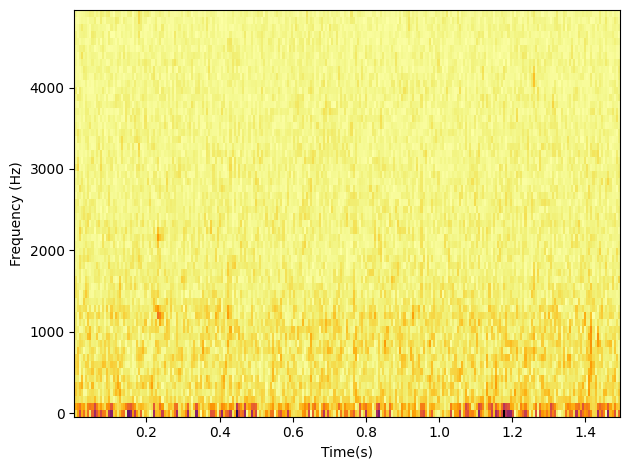

In [14]:
segment.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

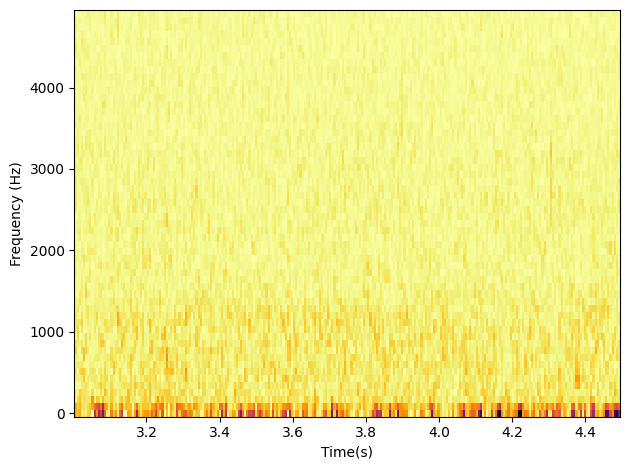

In [12]:
segment2.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

### *Упражнение 4.2.*
Нобходимо реализовать метод Барлетта и использовать его для оценки спектра мощности взятых ранее шумовых сигналов.

Получившийся код представлен ниже:

In [16]:
from thinkdsp import Spectrum
import numpy as np

def bartlett_method(wave, seg_length=512, win_flag=True):
    # make a spectrogram and extract the spectrums
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    # extract the power array from each spectrum
    psds = [spectrum.power for spectrum in spectrums]

    # compute the root mean power (which is like an amplitude)
    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    # make a Spectrum with the mean amplitudes
    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum


Пример использования функции и её результат представлены ниже:

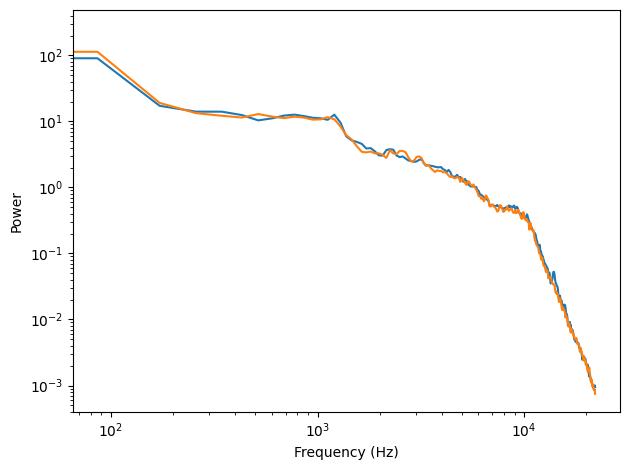

In [17]:
psd = bartlett_method(segment)
psd2 = bartlett_method(segment2)

psd.plot_power()
psd2.plot_power()

decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         **loglog)

По рисунку несложно увидеть, что полученные графики похожи друг на друга. Как и предполагалось, звук дождя на записи не сильно изменяется в течение времени, он относительно монотонен в отличие от, например, звука грозы с периодическими раскатами грома или звука волн.

### *Упражнение 4.3.*
Необходимо скачать и открыть csv таблицу с историческими данными о ежедневной цене BitCoin.

В результате получаем следующую таблицу:


In [19]:
import pandas as pd

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv',
                 parse_dates=[0])
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


Для анализа спектра цен постоим график закрывающей цены за период в таблице.

В итоге, получаем динамику изменения цены биткоина при закрытии торгов, а также число измерений - создаём wave.

График представлен ниже:

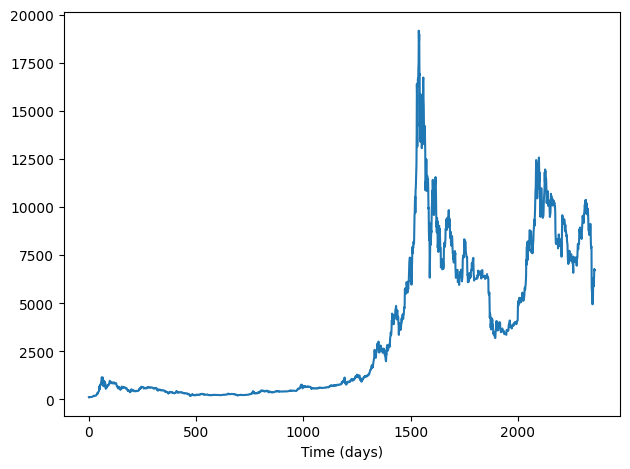

In [20]:
ys = df['Closing Price (USD)']
ts = df.index

from thinkdsp import Wave, decorate

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

Теперь выведем спектр и график мощности данного графика:

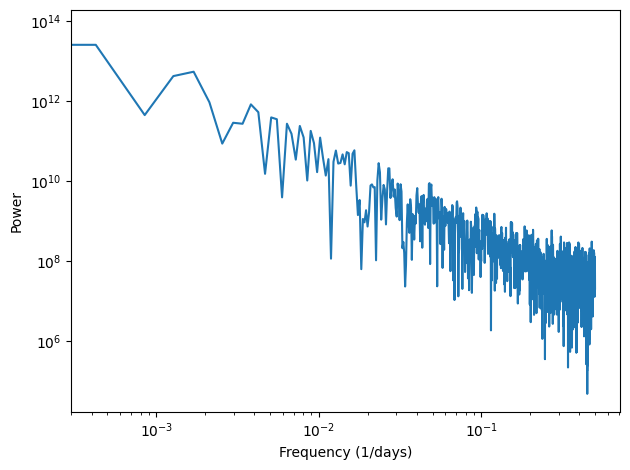

In [21]:
spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (1/days)',
         ylabel='Power',
         xscale='log',
         yscale='log')

Визуально получившийся спектр похож и на спектр красного, и на спектр розового шума, поэтому выведем значение наклона:

In [22]:
spectrum.estimate_slope()[0]

-1.7332540936758951

Полученное значение близко к соответсвтующему значению красного шума (-2), но не равно ему, поэтому классифицируем наш шум как розовый.

### *Упражнение 4.4.*
Необходимо написать класс для моделирования счётчика Гейгера с использовванием некоррелированного пуассонового шума.

Класс, наследующийся от Noise и предоставлющий метод evaluate, представлен ниже:

In [23]:
from thinkdsp import Noise
import numpy as np
import matplotlib.pyplot as plt

class UncorrelatedPoissonNoise(Noise):

    def evaluate(self, ts):
        ys = np.random.poisson(self.amp, len(ts))
        return ys

Задаём amp = 0.001, частоту 10 кГц (+- 10 «щелчков» в секунду, похоже на звук счетчика Гейгера) и создаём экземпляр класса.

Данный звук действительно схож со звуком счетчика:


In [46]:
amp = 0.001
framerate = 10000
duration = 15

signal = UncorrelatedPoissonNoise(amp=amp)
wave = signal.make_wave(duration=duration, framerate=framerate)
wave.make_audio()

Полученные графики для длительности 15с и 1с выглядят так:

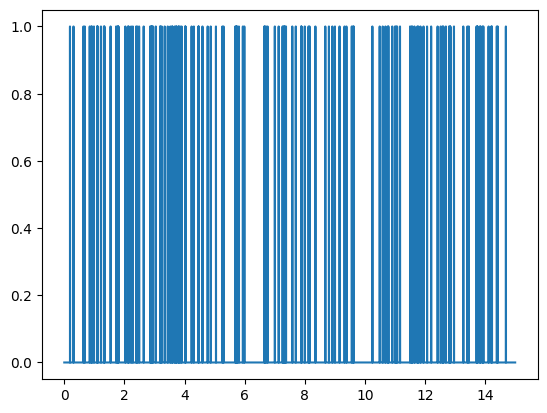

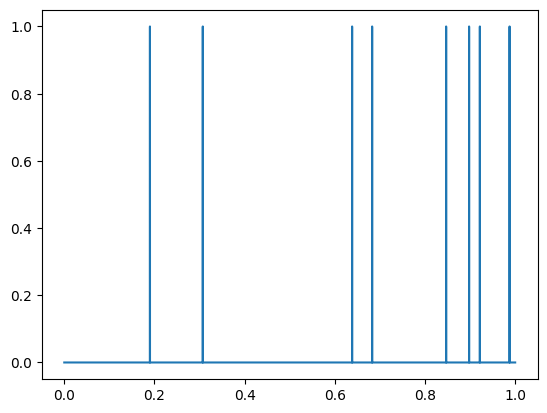

In [47]:
wave.plot()
plt.show()
wave.segment(start=0, duration=1).plot()
plt.show()

Теперь рассмотрим спектр мощности получившегося звука в логарифмической шкале.

Полученный график выглядит следующим образом:


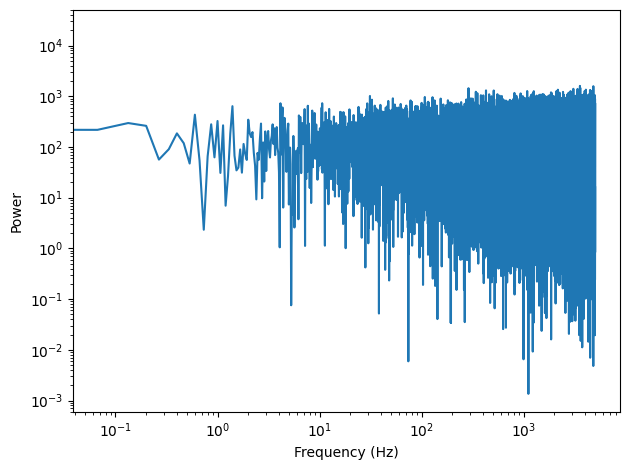

In [48]:
from thinkdsp import decorate

spectrum = wave.make_spectrum()
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         xscale='log',
         yscale='log')

По графику видно, что он похож на график белого шума, что подтверждает аудиофайл, сгенерированнный для amp = 0.1.

Проверим, так ли это - выведем значение наклона:

In [49]:
spectrum.estimate_slope().slope

0.005497821652031437

Полученное значение достаточно близко к нулю, чтобы определить, что перед нами белый шум.

### *Упражнение 4.5.*
Необходимо реализовать на языке python алгоритм Voss-McCartney, для более эффективной генерации розового шума.

Главная идея алгоритма состоит в суммировании нескольких последовательностей случайных чисел, которые обновляются с разной частотой дискретизации.

Первый источник должен обновляться на каждом временном шаге; второй источник - на каждом втором временном шаге, третий источник - на каждом четвертом шаге и так далее. Мы же будем реализовывать вариант со случайно распределенной частотой обновлений.

1)Генерация двумерного массива. Первое измерение – количество точек, для которых будет создан итоговый розовый шум, второе – количество источников для итогового суммирования. Первй столбец и строка заполняются случайными числами.

2)Функция генерации n-ого числа испытаний Бернулли, чтобы узнавать в каких столбцах произойдут обновления.
Результаты, превышающие число столбцов – обнуляем:

3)Создание строк, в которых будут соответствующие обновления, и обновление значений в соответствующих парах строк-столбцов, запишем в них случайные числа от 0 до 1.

4)Удаление nan - вместо них пишем предыдущее не nan значение в соответствующем столбце. Для этого воспользуемся библиотекой pandas и функцией fill.

5)Суммирование в соответствующей строке, и наконец получаем розовый шум.

Итоговая функция выглядит так:


In [51]:
from thinkdsp import Wave, decorate
import numpy as np
import pandas as pd

def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.

    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values


Проверим, получится ли создать розовый шум:

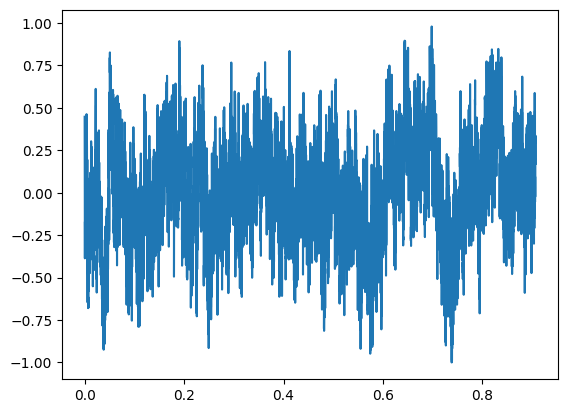

In [53]:
ys = voss(10000)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [54]:
wave.make_audio()

Представим получившуюся зависимость в виде спектра мощности в логарифмической шкале:

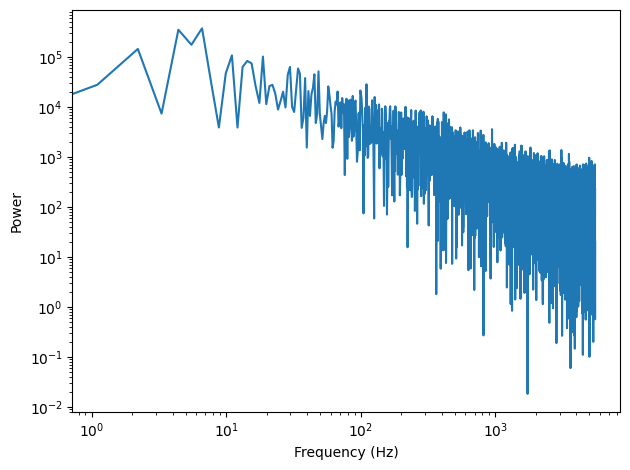

In [55]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)',
         ylabel='Power',
         xscale='log',
         yscale='log')

По графику видно, что спектр похож на спектр розового шума, проверим значение наклона:


In [56]:
spectrum.estimate_slope().slope

-1.0116138697891175

Как и ожидалось, полученное значение близко к 1, значит, можно сделать вывод о том, что у нас получилось создать розовый шум.